In [3]:
import pandas as pd #for analysis
import numpy as np
import seaborn as sns  #for data visualizing
import matplotlib.pyplot as plt #for charts
import matplotlib.pyplot as mpl
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf 
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot

import folium

In [4]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

NOw importing data

In [5]:
df= pd.read_csv("covid19_italy_region.csv")

In [6]:
df.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN


In [7]:
df.columns #to show all the columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [8]:
df.tail()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
1780,1780,2020-05-18T17:00:00,ITA,9,Toscana,43.769231,11.255889,197,66,263,2310,2573,13,6399,989,9961,148580.0
1781,1781,2020-05-18T17:00:00,ITA,22,P.A. Trento,46.068935,11.121231,41,8,49,199,248,13,3650,453,4351,41383.0
1782,1782,2020-05-18T17:00:00,ITA,10,Umbria,43.106758,12.388247,24,2,26,51,77,0,1274,73,1424,39512.0
1783,1783,2020-05-18T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,30,0,30,30,60,1,971,143,1174,9595.0
1784,1784,2020-05-18T17:00:00,ITA,5,Veneto,45.434905,12.338452,263,22,285,3719,4004,9,13143,1803,18950,275851.0


In [9]:
df.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,630.000000
mean,892.000000,11.857143,43.046293,12.225955,792.147339,95.983754,888.131092,2193.420168,3081.551261,126.542297,1824.921569,732.362465,5638.835294,69300.784127
std,515.429433,6.275556,2.489478,2.659693,1801.520575,191.623610,1987.289440,4269.042111,5971.461392,275.070414,4809.963971,2161.655161,12441.082543,68942.401259
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,3482.000000
25%,446.000000,7.000000,41.125596,11.121231,45.000000,6.000000,52.000000,109.000000,181.000000,6.000000,5.000000,9.000000,278.000000,23155.750000
50%,892.000000,12.000000,43.616760,12.388247,170.000000,27.000000,204.000000,652.000000,876.000000,34.000000,209.000000,113.000000,1392.000000,41383.000000
75%,1338.000000,17.000000,45.434905,13.768136,639.000000,99.000000,733.000000,2225.000000,2978.000000,112.000000,1265.000000,397.000000,4412.000000,98309.000000
max,1784.000000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,30382.000000,37307.000000,3251.000000,42403.000000,15543.000000,85019.000000,343213.000000


In [10]:
df.isnull().sum() #to find the null values in the data

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

# Visualizing the Data using scatter plot and relating the variables

In [11]:
df.drop(['SNo'],axis=1,inplace=True)

In [12]:
df

,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,2020-05-18T17:00:00,ITA,9,Toscana,43.769231,11.255889,197,66,263,2310,2573,13,6399,989,9961,148580.0
1781,2020-05-18T17:00:00,ITA,22,P.A. Trento,46.068935,11.121231,41,8,49,199,248,13,3650,453,4351,41383.0
1782,2020-05-18T17:00:00,ITA,10,Umbria,43.106758,12.388247,24,2,26,51,77,0,1274,73,1424,39512.0
1783,2020-05-18T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,30,0,30,30,60,1,971,143,1174,9595.0


In [13]:
total_cases=df['TotalPositiveCases'].sum()
print('The total number of cases till now in Italy is',total_cases)


The total number of cases till now in Italy is 10065321


In [14]:
df.groupby('RegionName')['TotalPositiveCases'].sum().sort_values(ascending=False).to_frame().style.background_gradient(cmap ='Reds')


,TotalPositiveCases
RegionName,
Lombardia,3870868
Emilia-Romagna,1267894
Piemonte,1158205
Veneto,878091
Toscana,448581
Liguria,369991
Marche,325335
Lazio,312082
Campania,212899


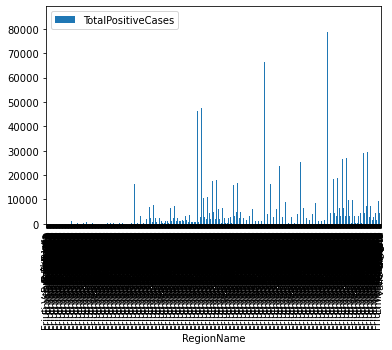

In [15]:
df.plot(kind="bar", x= 'RegionName', y= 'TotalPositiveCases')


In [16]:
df.iplot(kind="bar", x= 'RegionName', y= 'TotalPositiveCases')


In [23]:
italy_cord = pd.read_csv("covid19_italy_province.csv")


In [18]:
italy_cord

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude,Longitude,TotalPositiveCases
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
10875,10875,2020-05-18T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2641
10876,10876,2020-05-18T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2633
10877,10877,2020-05-18T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,5008
10878,10878,2020-05-18T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2818


In [24]:
italy_cord


,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude,Longitude,TotalPositiveCases
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
10875,10875,2020-05-18T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,2641
10876,10876,2020-05-18T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2633
10877,10877,2020-05-18T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,5008
10878,10878,2020-05-18T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,2818


In [25]:
df_full = pd.merge(df,italy_cord, on = 'RegionName')

In [26]:
df_full


,Date_x,Country_x,RegionCode_x,RegionName,Latitude_x,Longitude_x,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,...,SNo,Date_y,Country_y,RegionCode_y,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude_y,Longitude_y,TotalPositiveCases_y
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,2020-02-24T18:00:00,ITA,13,69,Chieti,CH,42.351032,14.167546,0
1,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,1,2020-02-24T18:00:00,ITA,13,66,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,2,2020-02-24T18:00:00,ITA,13,68,Pescara,PE,42.464584,14.213648,0
3,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,3,2020-02-24T18:00:00,ITA,13,67,Teramo,TE,42.658918,13.704400,0
4,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,4,2020-02-24T18:00:00,ITA,13,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924795,2020-05-18T17:00:00,ITA,5,Veneto,45.434905,12.338452,263,22,285,3719,...,10875,2020-05-18T17:00:00,ITA,5,26,Treviso,TV,45.667546,12.245074,2641
924796,2020-05-18T17:00:00,ITA,5,Veneto,45.434905,12.338452,263,22,285,3719,...,10876,2020-05-18T17:00:00,ITA,5,27,Venezia,VE,45.434905,12.338452,2633
924797,2020-05-18T17:00:00,ITA,5,Veneto,45.434905,12.338452,263,22,285,3719,...,10877,2020-05-18T17:00:00,ITA,5,23,Verona,VR,45.438390,10.993527,5008
924798,2020-05-18T17:00:00,ITA,5,Veneto,45.434905,12.338452,263,22,285,3719,...,10878,2020-05-18T17:00:00,ITA,5,24,Vicenza,VI,45.547497,11.545971,2818


In [27]:
df.iplot(kind="hist", x= 'RegionName', y= 'HospitalizedPatients')


In [28]:
df.iplot(kind="scatter", x= 'RegionName', y= 'TotalPositiveCases')


In [31]:
df.iplot(kind="bar", x= 'RegionName', y= 'HospitalizedPatients')


In [ ]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude_x'], df_full['Longitude_x'], df_full['TotalPositiveCases_x'], df_full['RegionName']):
    folium.CircleMarker([lat, lon], radius=value*0.003, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.1 ).add_to(map)

map